In [1]:
import shutil
import os

In [2]:
path = r'E:\Courses\self driving car udemy\12-classify road symbols'

In [3]:
os.listdir(path)

['131-simple code.txt',
 '132-prograss traffic sign.MP4',
 '133-Lenet implementation.MP4',
 '134-fine tuning model.MP4',
 '136-testing.MP4',
 '137- fit generator.MP4',
 '138-code.txt',
 'image sources.txt',
 'jadslim-german-traffic-signs-a11dc223e390.zip',
 'signs',
 'Traffic-Signs-Starter-Project.ipynb.zip']

In [4]:
#shutil.unpack_archive(path+r'\jadslim-german-traffic-signs-a11dc223e390.zip',path+r'\signs','zip')

In [5]:
path = path+r'\signs'

In [6]:
os.listdir(path)

['jadslim-german-traffic-signs-a11dc223e390']

In [7]:
path = path+r'\jadslim-german-traffic-signs-a11dc223e390'

In [8]:
os.listdir(path)

['signnames.csv', 'test.p', 'train.p', 'valid.p']

In [9]:
import csv

In [10]:
with open(path+r'\signnames.csv')as file:
    csv_reader = csv.reader(file)
    data_lines = list(csv_reader)

In [11]:
data_lines

[['ClassId', 'SignName'],
 ['0', 'Speed limit (20km/h)'],
 ['1', 'Speed limit (30km/h)'],
 ['2', 'Speed limit (50km/h)'],
 ['3', 'Speed limit (60km/h)'],
 ['4', 'Speed limit (70km/h)'],
 ['5', 'Speed limit (80km/h)'],
 ['6', 'End of speed limit (80km/h)'],
 ['7', 'Speed limit (100km/h)'],
 ['8', 'Speed limit (120km/h)'],
 ['9', 'No passing'],
 ['10', 'No passing for vechiles over 3.5 metric tons'],
 ['11', 'Right-of-way at the next intersection'],
 ['12', 'Priority road'],
 ['13', 'Yield'],
 ['14', 'Stop'],
 ['15', 'No vechiles'],
 ['16', 'Vechiles over 3.5 metric tons prohibited'],
 ['17', 'No entry'],
 ['18', 'General caution'],
 ['19', 'Dangerous curve to the left'],
 ['20', 'Dangerous curve to the right'],
 ['21', 'Double curve'],
 ['22', 'Bumpy road'],
 ['23', 'Slippery road'],
 ['24', 'Road narrows on the right'],
 ['25', 'Road work'],
 ['26', 'Traffic signals'],
 ['27', 'Pedestrians'],
 ['28', 'Children crossing'],
 ['29', 'Bicycles crossing'],
 ['30', 'Beware of ice/snow'],
 ['

In [12]:
path

'E:\\Courses\\self driving car udemy\\12-classify road symbols\\signs\\jadslim-german-traffic-signs-a11dc223e390'

In [13]:
os.listdir(path)

['signnames.csv', 'test.p', 'train.p', 'valid.p']

In [14]:
# begin importing the libararies
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
import pickle
import pandas as pd
import random
%matplotlib inline

Using TensorFlow backend.


In [15]:
np.random.seed(0)

In [16]:
with open(path+r'\train.p','rb') as f:
    train_data = pickle.load(f)
with open(path+r'\valid.p','rb') as f:
    valid_data = pickle.load(f)
with open(path+r'\test.p','rb') as f:
    test_data = pickle.load(f)
print(type(train_data))

<class 'dict'>


In [17]:
X_train ,y_train = train_data['features'], train_data['labels']
X_val ,y_val = valid_data['features'], valid_data['labels']
X_test ,y_test = test_data['features'], test_data['labels']

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [19]:
assert(X_train.shape[0]==y_train.shape[0]),"the number of images is not eqaul to number of labels"
assert(X_val.shape[0]==y_val.shape[0]),"the number of images is not eqaul to number of labels"
assert(X_test.shape[0]==y_test.shape[0]),"the number of images is not eqaul to number of labels"
assert(X_train.shape[1:] == (32,32,3)),"the shape of the image is not correct"
assert(X_val.shape[1:] == (32,32,3)),"the shape of the image is not correct"
assert(X_test.shape[1:] == (32,32,3)),"the shape of the image is not correct"

In [20]:
data = pd.read_csv(path+r'\signnames.csv')

In [21]:
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

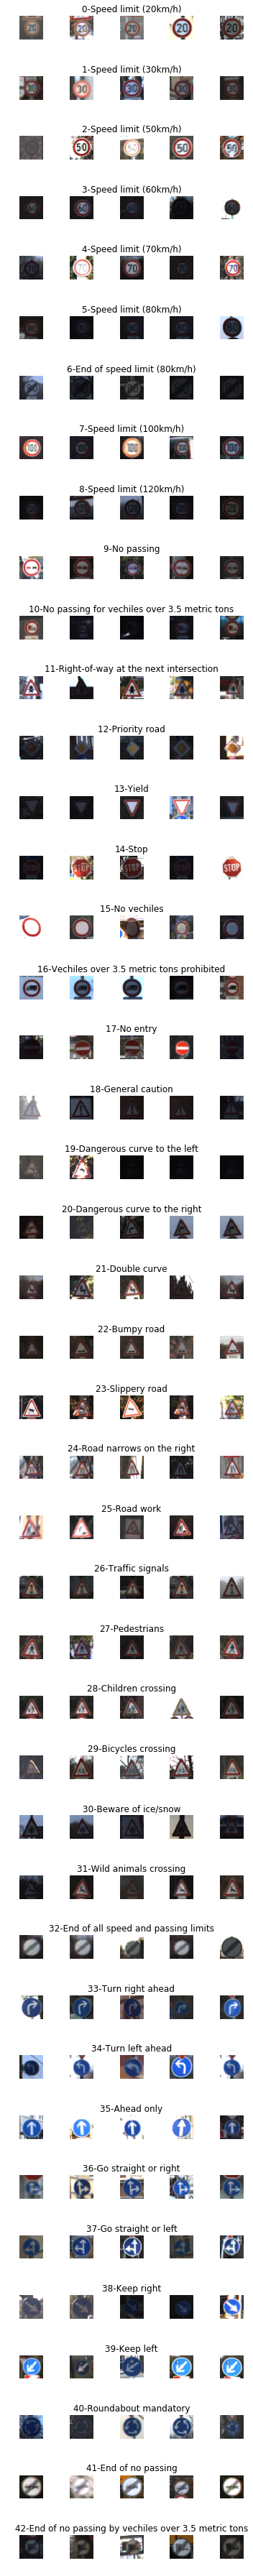

In [22]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+"-"+row['SignName'])
            num_of_samples.append(len(x_selected))
#iterrows (index, series)



[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

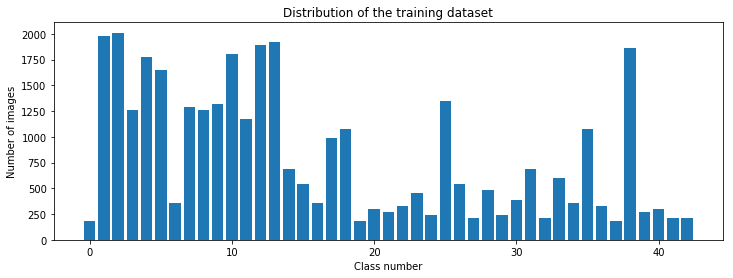

In [23]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [24]:
import cv2

(32, 32, 3)
36


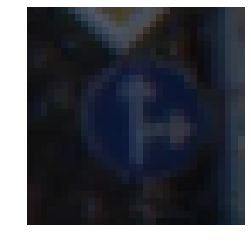

In [25]:
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

In [26]:
def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

(32, 32)


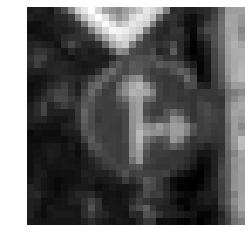

In [27]:
img = grayscale(X_train[1000])
plt.imshow(img,cmap='gray')
plt.axis('off')
print(img.shape)

(32, 32)


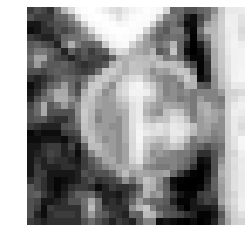

In [28]:
def equalize(img):
    return cv2.equalizeHist(img)
img = equalize(img)
plt.imshow(img,cmap='gray')
plt.axis('off')
print(img.shape)

In [29]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
X_train = np.array(list(map(preprocessing,X_train)))
X_val = np.array(list(map(preprocessing,X_val)))
X_test = np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


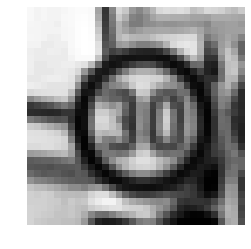

In [30]:
plt.imshow(X_train[np.random.randint(0,len(X_train)-1)],cmap='gray')
plt.axis("off")
print(X_train.shape)

In [31]:
X_train = X_train.reshape(34799, 32, 32,1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [34]:
datagen.fit(X_train)

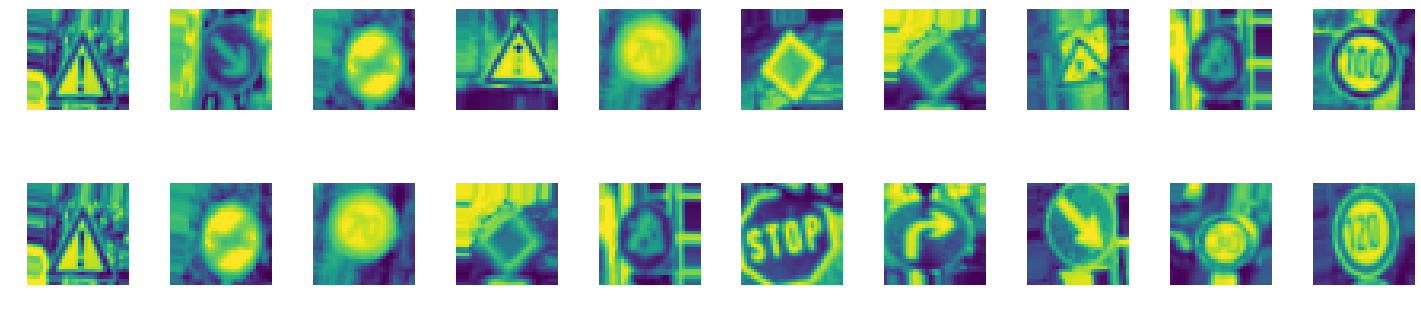

In [35]:
batches = datagen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)

fig,axs = plt.subplots(2,10,figsize=(20,5))
fig.tight_layout()

for j in range(2):
    for i in range(10):
        axs[j,i].imshow(X_batch[(i)*(j+1)].reshape(32,32)) 
        axs[j,i].axis('off')

In [36]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [37]:
y_train = to_categorical(y_train,43)
y_val = to_categorical(y_val,43)
y_test = to_categorical(y_test,43)

In [38]:
def modified_model():
    model = Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size =(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [39]:
model = modified_model()

In [40]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)          0         
__________

In [40]:
model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_val,y_val),batch_size=400,verbose=1,shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 1437s 41ms/step - loss: 2.7033 - acc: 0.2779 - val_loss: 0.8997 - val_acc: 0.7580
Epoch 2/10
34799/34799 [==============================] - 1469s 42ms/step - loss: 0.8179 - acc: 0.7475 - val_loss: 0.3098 - val_acc: 0.9170
Epoch 3/10
34799/34799 [==============================] - 1475s 42ms/step - loss: 0.4420 - acc: 0.8617 - val_loss: 0.2130 - val_acc: 0.9472
Epoch 4/10
34799/34799 [==============================] - 1528s 44ms/step - loss: 0.3078 - acc: 0.9054 - val_loss: 0.1774 - val_acc: 0.9553
Epoch 5/10
34799/34799 [==============================] - 1352s 39ms/step - loss: 0.2480 - acc: 0.9219 - val_loss: 0.1217 - val_acc: 0.9664
Epoch 6/10
34799/34799 [==============================] - 1338s 38ms/step - loss: 0.2060 - acc: 0.9359 - val_loss: 0.1159 - val_acc: 0.9662
Epoch 7/10
34799/34799 [==============================] - 1332s 38ms/step - loss: 0.1834 - acc: 0.9436 - val_lo

In [42]:
pickle_out = open(r'model.pickle','wb')
pickle.dump(model,pickle_out)
pickle_out.close()

Text(0.5, 0, 'epoch')

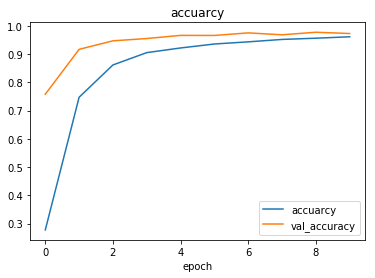

In [43]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend(['accuarcy','val_accuracy'])
plt.title('accuarcy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

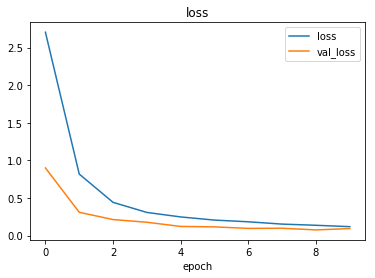

In [44]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')

In [45]:
score = model.evaluate(X_test,y_test)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

12630/12630 [==============================] - 71s 6ms/step
Test score:  0.1474135024442101
Test accuracy:  0.9560570071730836


In [38]:
from PIL import Image
import requests

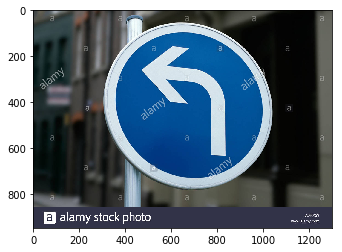

In [45]:
url ='https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url,stream=True)
img = Image.open(r.raw)
plt.imshow(img,cmap=plt.get_cmap('gray'))

(32, 32)


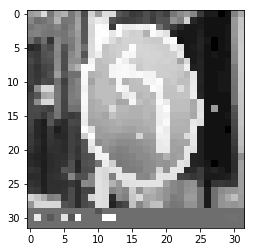

In [46]:
img = np.asarray(img)
img = cv2.resize(img,(32,32))
img = preprocessing(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img.shape)

In [47]:
img = img.reshape(1,32,32,1)

In [48]:
print("the prediction class is : ",str(model.predict_classes(img)))
print(data["SignName"][model.predict_classes(img)])

the prediction class is :  [34]
34    Turn left ahead
Name: SignName, dtype: object


(32, 32)
the prediction class is :  [1]
1    Speed limit (30km/h)
Name: SignName, dtype: object


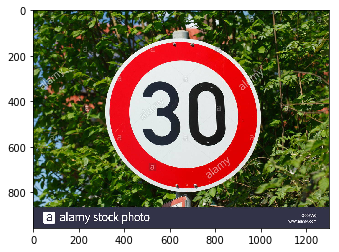

In [49]:
url ='https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url,stream=True)
img = Image.open(r.raw)
plt.imshow(img,cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img,(32,32))
img = preprocessing(img)
#plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1,32,32,1)
print("the prediction class is : ",str(model.predict_classes(img)))
print(data["SignName"][model.predict_classes(img)])

(32, 32)
the prediction class is :  [24]


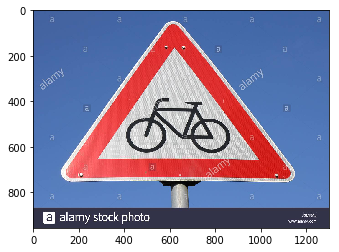

In [44]:
url ='https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url,stream=True)
img = Image.open(r.raw)
plt.imshow(img,cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img,(32,32))
img = preprocessing(img)
#plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1,32,32,1)
print("the prediction class is : ",str(model.predict_classes(img)))
print(data["SignName"][model.predict_classes(img)])

In [39]:
model_genertor = modified_model()

In [40]:
model_genertor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)          0         
__________

In [42]:
model_genertor.fit_generator(datagen.flow(X_train,y_train,batch_size=50),
                             steps_per_epoch=2000,
                             epochs=6,
                             validation_data=(X_val,y_val),
                             shuffle=1,
                             verbose=1
                            )

Epoch 1/6
2000/2000 [==============================] - 3914s 2s/step - loss: 1.2453 - acc: 0.6319 - val_loss: 0.1510 - val_acc: 0.9601
Epoch 2/6
2000/2000 [==============================] - 3905s 2s/step - loss: 0.4356 - acc: 0.8620 - val_loss: 0.0818 - val_acc: 0.9776
Epoch 3/6
2000/2000 [==============================] - 3961s 2s/step - loss: 0.3111 - acc: 0.9032 - val_loss: 0.0556 - val_acc: 0.9864
Epoch 4/6
2000/2000 [==============================] - 4330s 2s/step - loss: 0.2486 - acc: 0.9223 - val_loss: 0.0368 - val_acc: 0.9891
Epoch 5/6
2000/2000 [==============================] - 4133s 2s/step - loss: 0.2170 - acc: 0.9327 - val_loss: 0.0375 - val_acc: 0.9866
Epoch 6/6
2000/2000 [==============================] - 4347s 2s/step - loss: 0.1885 - acc: 0.9425 - val_loss: 0.0358 - val_acc: 0.9905


In [43]:
pickle_out = open(r'generator_model.pickle','wb')
pickle.dump(model_genertor,pickle_out)
pickle_out.close()

In [44]:
url ='https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url,stream=True)
img = Image.open(r.raw)
plt.imshow(img,cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img,(32,32))
img = preprocessing(img)
#plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1,32,32,1)
print("the prediction class is : ",str(model_genertor.predict_classes(img)))

NameError: name 'requests' is not defined

In [47]:
score = model_genertor.evaluate(X_test,y_test)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

12630/12630 [==============================] - 70s 6ms/step
Test score:  0.12151598784636031
Test accuracy:  0.9676959620141266


(32, 32)
the prediction class is :  [30]


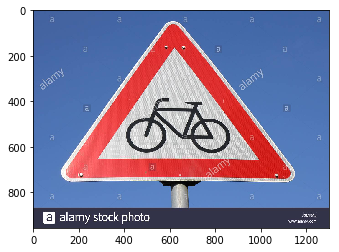

In [54]:
url ='https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url,stream=True)
img = Image.open(r.raw)
plt.imshow(img,cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img,(32,32))
img = preprocessing(img)
#plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1,32,32,1)
print("the prediction class is : ",str(model_genertor.predict_classes(img)))

In [35]:
import pickle

In [36]:
pickle_in = open('generator_model.pickle','rb')
model = pickle.load(pickle_in)
pickle_in.close()

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)               0         
__________

In [43]:
score = model.evaluate(X_test,y_test)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

12630/12630 [==============================] - 103s 8ms/step
Test score:  0.08946162646744947
Test accuracy:  0.9775930324812683
